In [63]:
# # install packages if not already installed on your machine
# install.packages("car")
# install.packages("plyr")
# install.packages("olsrr")
# install.packages("leaps")
# install.packages("GGally")
# install.packages("reshape")
# install.packages("janitor")
# install.packages("ggplot2")
# install.packages("tidyverse")
# install.packages("gridExtra")
# install.packages("rsample")
 
# install.packages("cli")
# install.packages("rlang")
# install.packages("tidymodels")

#library("devtools")
#install_github("tidymodels/tidymodels")

# Load required packages
library("car")
library("plyr")
library("olsrr")
library("leaps")
library("GGally")
library("reshape")
library("janitor")
library("ggplot2")
library("tidyverse")
library("gridExtra")
library("rsample")
library("Metrics")
library("glmnet")
#library(rlang)
#library(tidymodels)
#sessionInfo()

also installing the dependencies ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift




# <center> Determining the factors that predict Life Expectancy using Predictive Regression Models </center>

**Authors** Group 1, Proposal (Fiona Wang, Jack Fan, William Surya, Ria Ji)

## 1. Introduction

### 1.1 Background

Life expectancy is the estimate of the average number of additional years a person is expected to live. A growing body of research suggests that a person's life expectancy may be affected by a number of essential external factors, including but not limited to alcohol consumption level(the rate of people in a country drinking alcohol or not), regional differences, developing or developed country, BMI(body mass index), population, schooling(the education level of the population).   

Because where people live and work, what kind of lifestyle they are having, big or small the population is(resources allocated per capita), and their educational level, all affect their health, further speaking, they will affect their life expectancy over time.   

Insurance companies typically charge premiums for customers who are likely to pass away shortly after purchasing their policy. This is because they are undertaking a greater risk of paying the entire policy before the customer has invested more than the policy's worth. Therefore, life insurance companies use one's life expectancy to set the pricing of life insurance policies (Social Security, 2019). If there is a huge gap between your age and your life expectancy, there is a lower risk for the insurance company and the policy will be set at a cheaper price.

### 1.2 Question

As such, the motivation behind this group project is to determine the factors that best predicts one's life expectancy. Formally, we are addressing the question: "What are the variables that best predict one's life expectancy?" 

### 1.3 Dataset


To answer this question, we will be using the Life Expectancy Dataset from Kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). The dataset consists of 2938 rows of Life Expectancy data collected from the World Health Organization (WHO) from 2000 to 2015 across 193 countries. Each row has 20 explanatory variable which can be grouped into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors(Kumar., 2017).

## 2. Methods and Results

### 2.1 Data Wrangling

We'll start by importing the dataset, loading it into a dataframe and inspecting the results. The original dataset can be found [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

In [2]:
le = read_csv("https://shorturl.at/FV478")

Rows: 2938 Columns: 22
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# In order to display all column names, we need to change the max # of cols displayed
options(repr.matrix.max.cols=22, repr.matrix.max.rows=37)

In [4]:
# preview the first and last 3 rows of our data
head(le, n = 3)
tail(le, n = 3)

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,19.1,83,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358,62,492,18.6,86,58,8.18,62,0.1,612.6965,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.21924,64,430,18.1,89,62,8.13,64,0.1,631.7450,31731688,17.7,17.7,0.470,9.9


Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


As described in [[3.4 Tidy data, 1]](https://datasciencebook.ca/wrangling.html#tidy-data), a cleaned dataset should have the following attributes:   
> 1. each row is a single observation,   
> 2. each column is a single variable, and   
> 3. each value is a single cell (i.e., its entry in the data frame is not shared with another value).   

Our data clearly comes in with a tidy format.

Three steps can be done to improve our data, listed as following: 
- For readibility and naming convention, we will convert variable names into lowercase, and we will replace space in variable names with underscores for the validity of syntax. We can do these with the help of the janitor library.
- Moreover, we will remove `N/A` values if there exists any. 
- Also, we will convert "country" and "status" variables into `factor` type as they are expected to be. 

In [5]:
le = clean_names(le)

In [6]:
le = le %>% 
    mutate(country = as_factor(country)) %>% 
    mutate(status = as_factor(status))

In [7]:
# remove all NAs

total_rows <- le %>% nrow()

print(sprintf("there are %d rows in the data frame",total_rows))

le <- na.omit(le)

print(sprintf("there are %d rows in the data frame", nrow(le)))

[1] "there are 2938 rows in the data frame"
[1] "there are 1649 rows in the data frame"


In [8]:
le = le %>%     
    mutate(country = as_factor(country)) %>%
    mutate(status = as_factor(status))

In [9]:
# review our data
tail(le, n = 3)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


### 2.2 Exploratory Data Analysis: Correlations

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


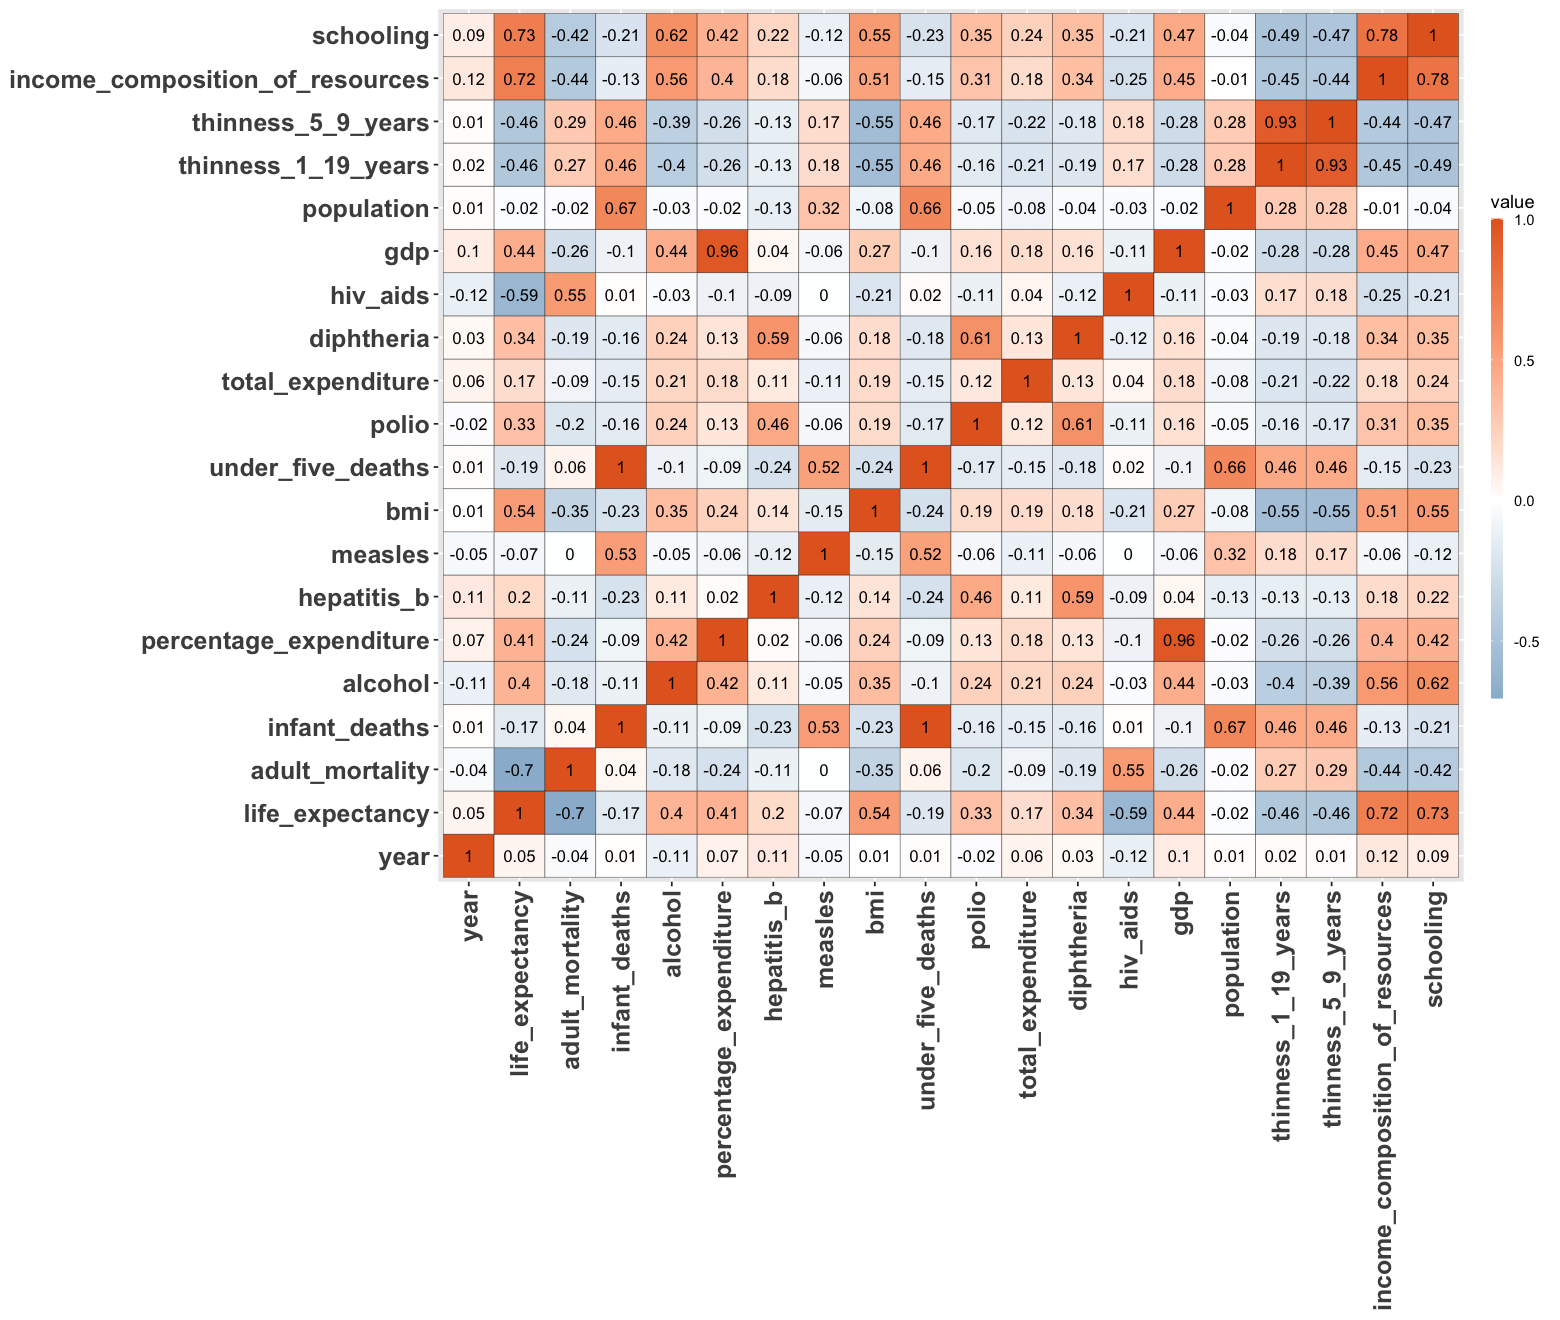

In [10]:
# correlation between numeric variables
cor_matrix <- cor(subset(le, select = -c(country, status) ))
melted <- melt(cor_matrix)

# Make plots larger 
options(repr.plot.width=13, repr.plot.height=11)

ggplot(melted) +
    geom_tile(aes(X1, X2, fill=value), colour = "black") + 
    geom_text(aes(X1, X2, label = round(value,2)), color = "black", size = 3.5) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
          axis.text=element_text(size=15, face="bold"), 
          axis.title=element_blank()) +
    scale_fill_gradient2(low = "#6D9EC1", high = "#E46726")+
    guides(fill = guide_colourbar(barwidth = 0.5, barheight = 20))

We noticed some of the variables have high correlation with our response variable, so we decide to explore each of their relationship with life expectancy individually. We plotted linear regression plot for the top 7 variables, which are gdp, adult_mortality, hiv_aids, income_composition_of_resources, school, percentage_expenditure, and bmi.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


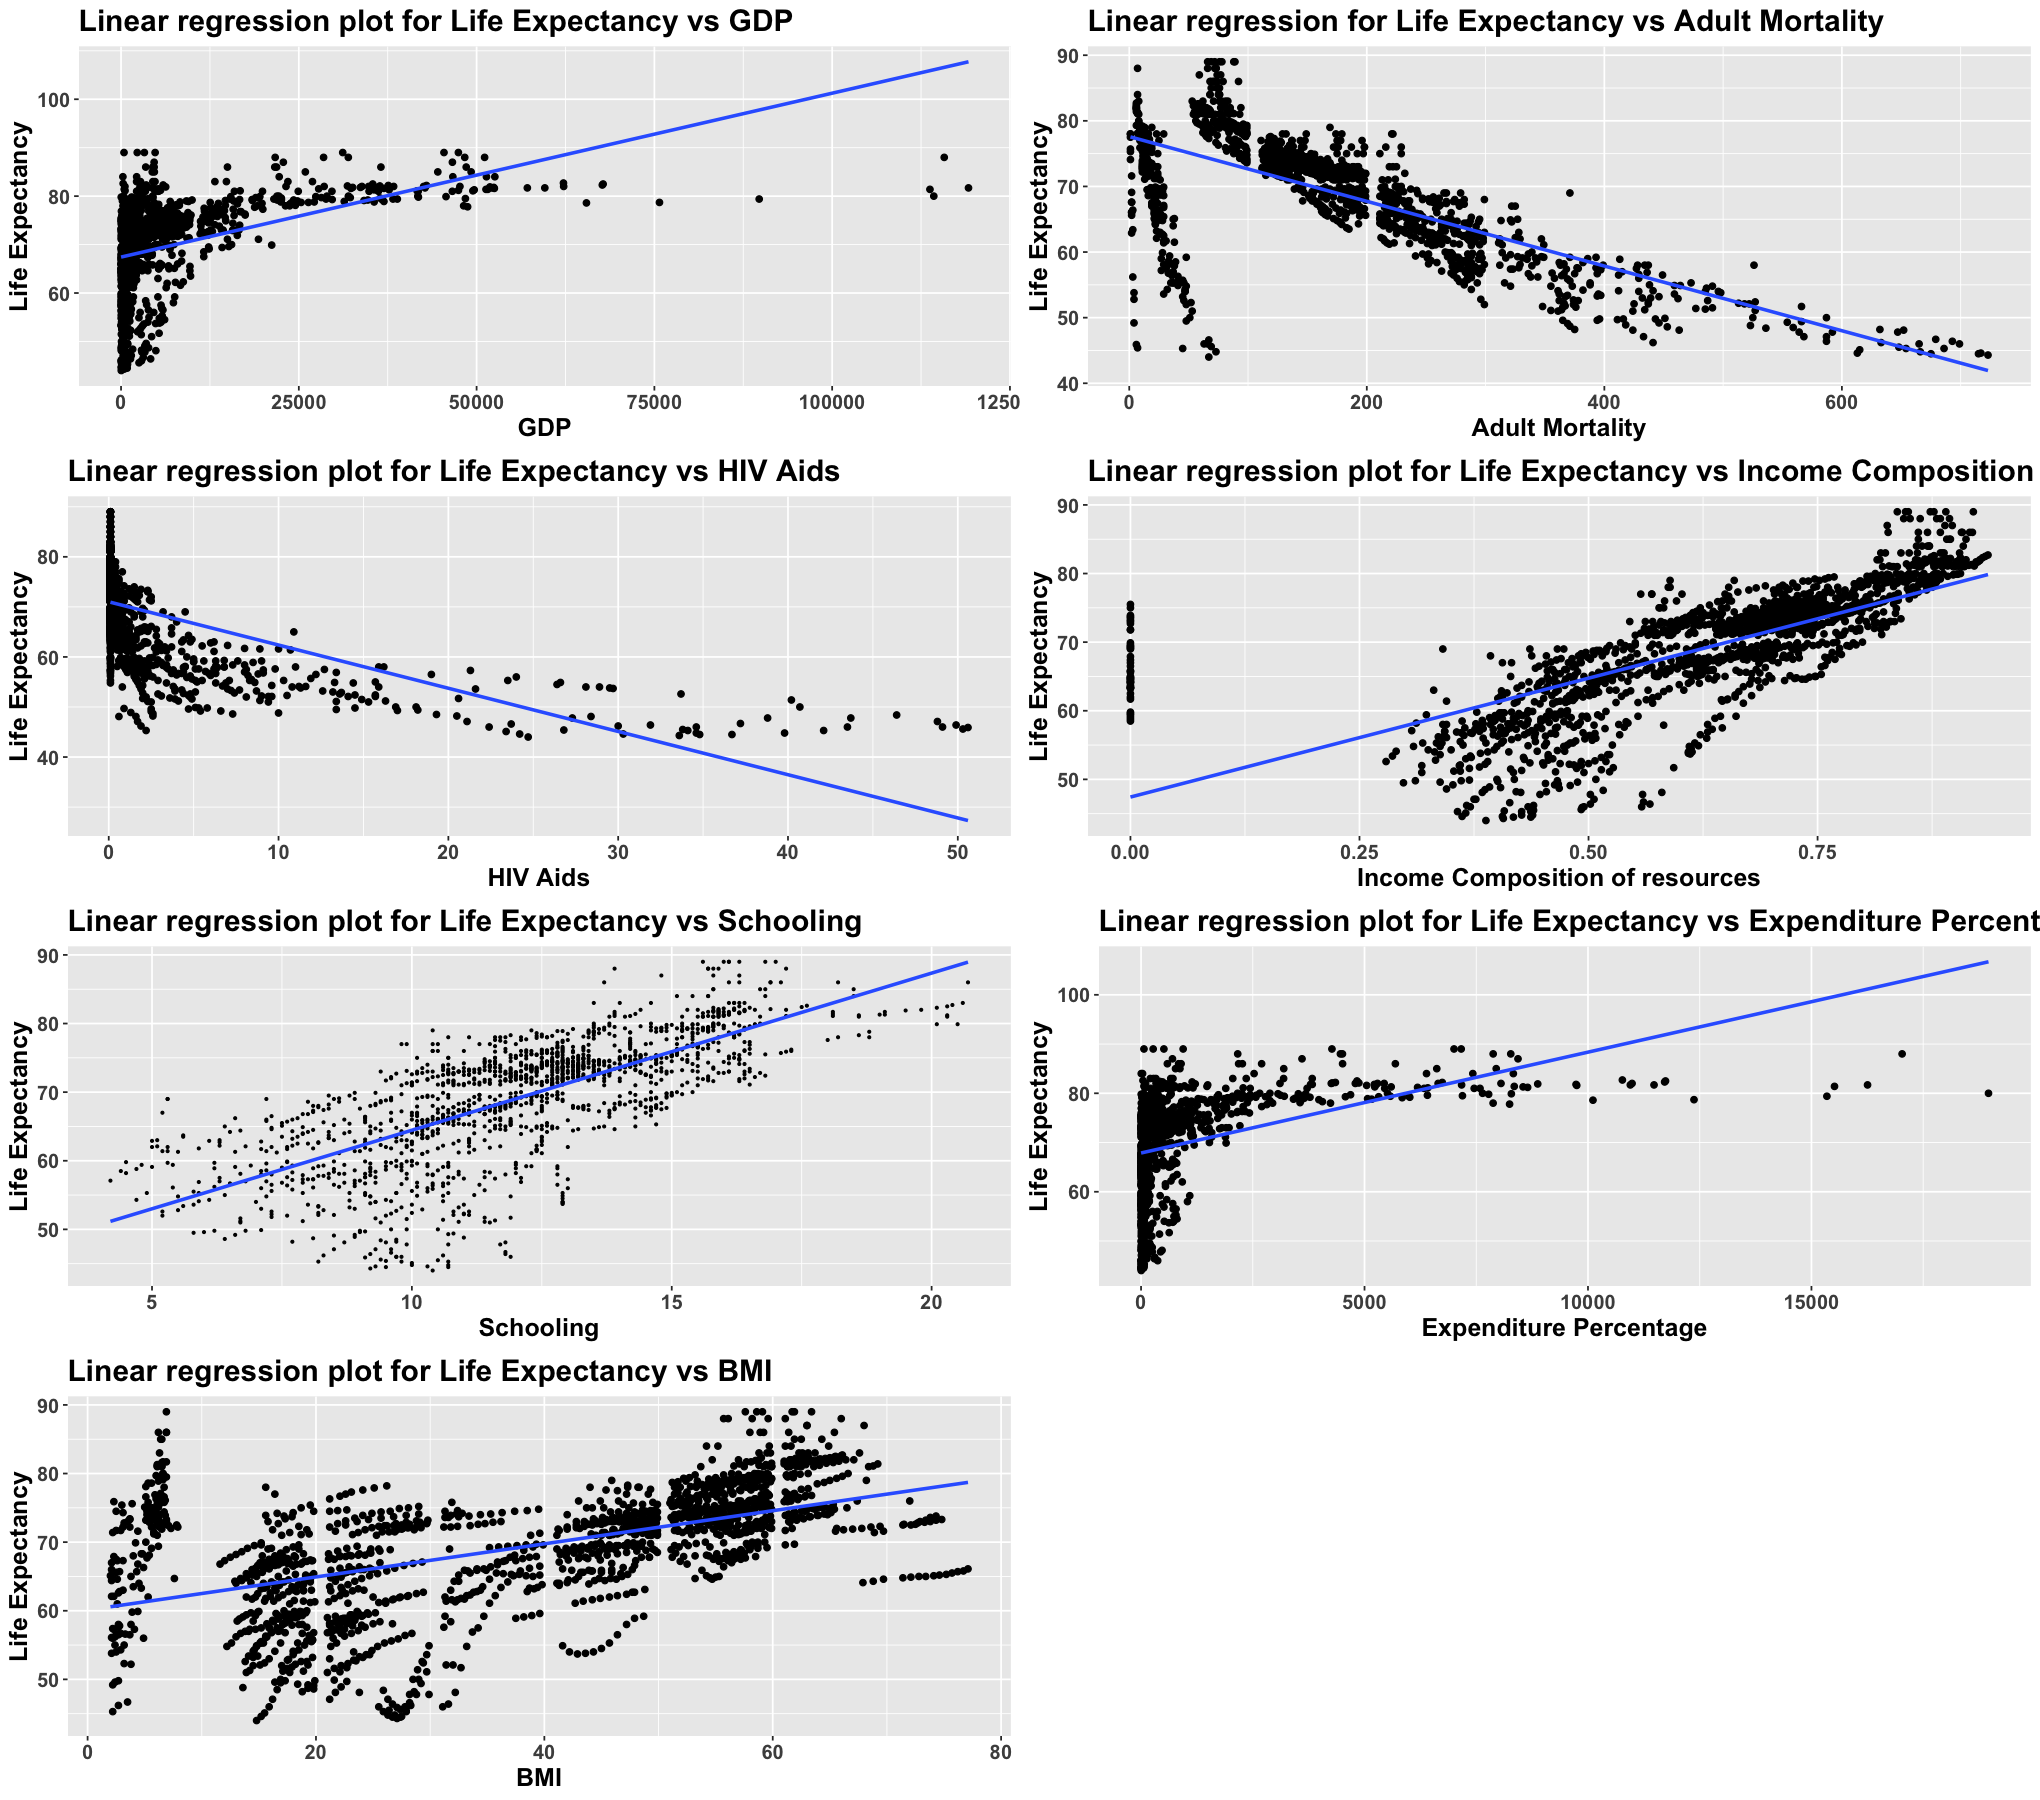

In [11]:
options(repr.plot.width=17, repr.plot.height=15, warnings = FALSE)
plot1 <- le %>% ggplot(mapping = aes(gdp, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs GDP", x="GDP", y="Life Expectancy")

plot2 <- le %>% ggplot(mapping = aes(adult_mortality, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression for Life Expectancy vs Adult Mortality", x="Adult Mortality", y="Life Expectancy")

plot3 <- le %>% ggplot(mapping=aes(hiv_aids,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs HIV Aids", x="HIV Aids", y="Life Expectancy")

plot4 <- le %>% ggplot(mapping=aes(income_composition_of_resources,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs Income Composition of Resources", 
         x="Income Composition of resources", y="Life Expectancy")

plot5 <- le %>% ggplot(mapping=aes(schooling,life_expectancy)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs Schooling", x="Schooling", y="Life Expectancy")

plot6 <- le %>% ggplot(mapping = aes(percentage_expenditure, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs Expenditure Percentage", x="Expenditure Percentage", y="Life Expectancy")

plot7 <- le %>% ggplot(mapping=aes(bmi,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs BMI", x="BMI", y="Life Expectancy")

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, nrow = 4)

From the graph above, gdp, hiv_aids, and percentage_expenditure seems to be mostly clustered along the lower end of the x-axis, with few points on the larger scale. For other four variables, points are mostly scattered apart along the regression line. We noticed that adult mortality have a strong linear association with life expectancy, but we are excluding this variable in later analysis since it is very similar to our response variable, both are measure of people's death, a variation of life expectancy, its strong correlation might effect the exploration on other possible predictor variables. For the same reason, we are also excluding infant_deaths and under_five_deaths, it is just a quantitative measurement of people with lower life expectancy. The country variable is not included as well since we are not considering life expectancy difference across countries and it cannot classify as a category variable.  

In [12]:
le = subset(select(le, -country))

### 2.3 Exploratory Data Analysis: Visualizations

First, we will start with exploring the distribution of life expectancy using a histogram. We can see from the graph below, the distribution is unimodel but not normal and it is slightly left-skewed. The mean year of life expectancy is slgihtly below 70, but there are above 200 people has life expectancy of 73 to 74 years. The graph below gives us a general view of the distribution of our response variable. 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


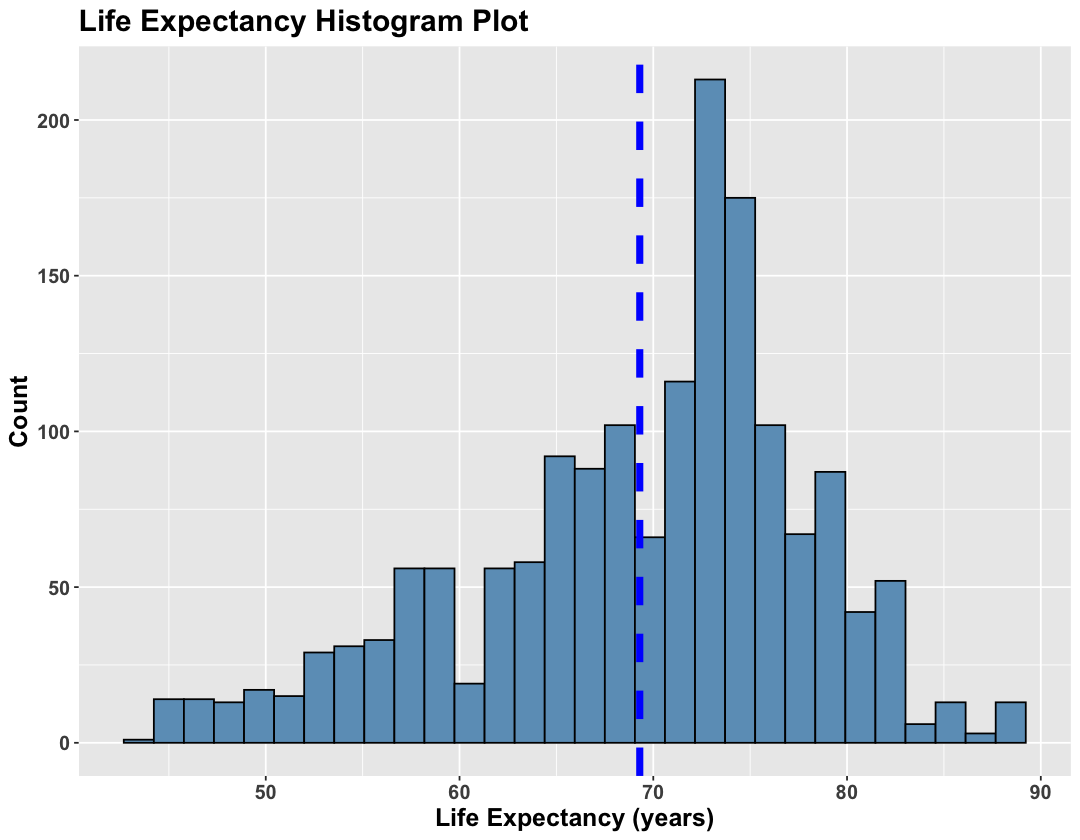

In [13]:
options(repr.plot.width=9, repr.plot.height=7)
le %>% ggplot(aes(x = life_expectancy)) + 
    geom_histogram(alpha = 2,color = "black", fill = "#6d9ec1") +
    geom_vline(aes(xintercept=mean(life_expectancy)), color="blue",
             linetype="dashed", lwd = 2)+
    labs(title="Life Expectancy Histogram Plot",x="Life Expectancy (years)", y = "Count")+
    theme(text=element_text(size=15, face = "bold"))

Also using a Q-Q plot to check if this data set is a normal distribution, which is one of the assumptions for doing linear regression. The graph below shows that our data set is not very normally distributed, it is a bit tailed and left skew. 

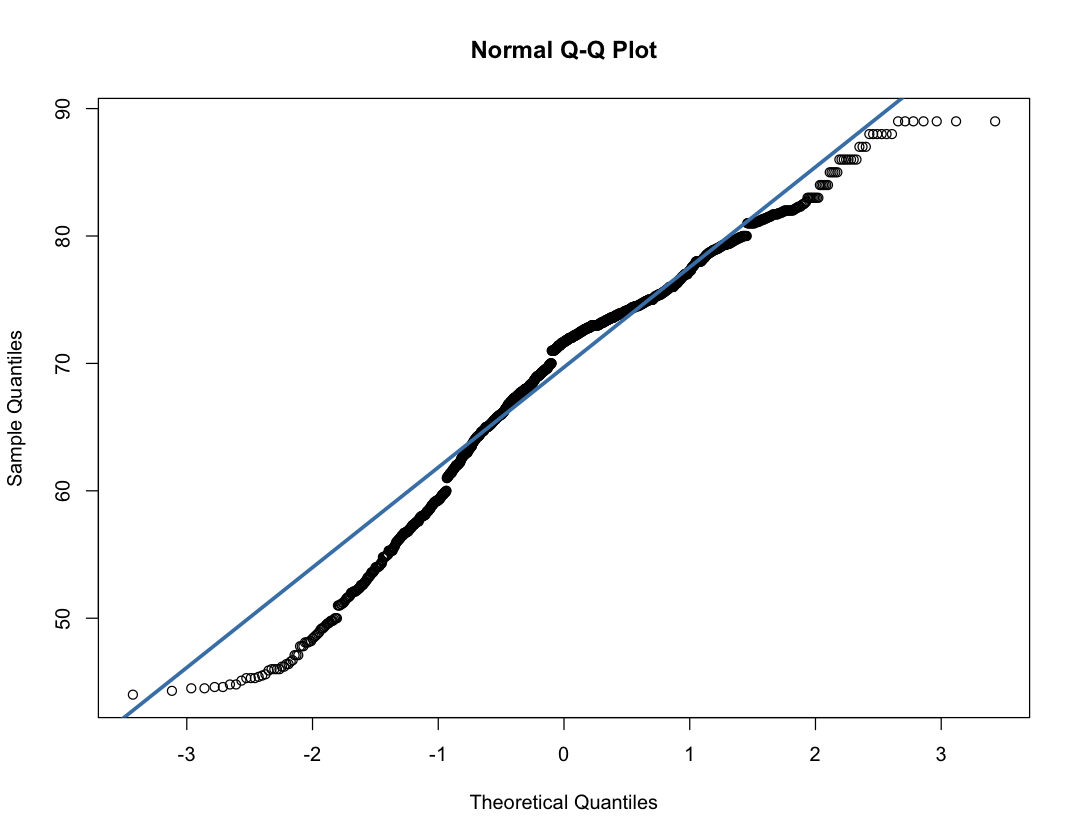

In [14]:
qqnorm(le$life_expectancy)
qqline(le$life_expectancy, col = "steelblue", lwd = 3)

Then we are exploring the relationship between Life Expectancy over the years from 2000 to 2015 according to country's developing status. From the graph below, the two lines of mean for both status showing an increasing trend, which means people have higher life expectancy on average in 2015 than 2000. We can also see a clear difference between developing countries and developed countires points, most of the data points are above 70 for developed country, while developing coutries' data points are mostly below 80. So considering this difference, we might need to include interaction terms in later analysis.

`geom_smooth()` using formula = 'y ~ x'


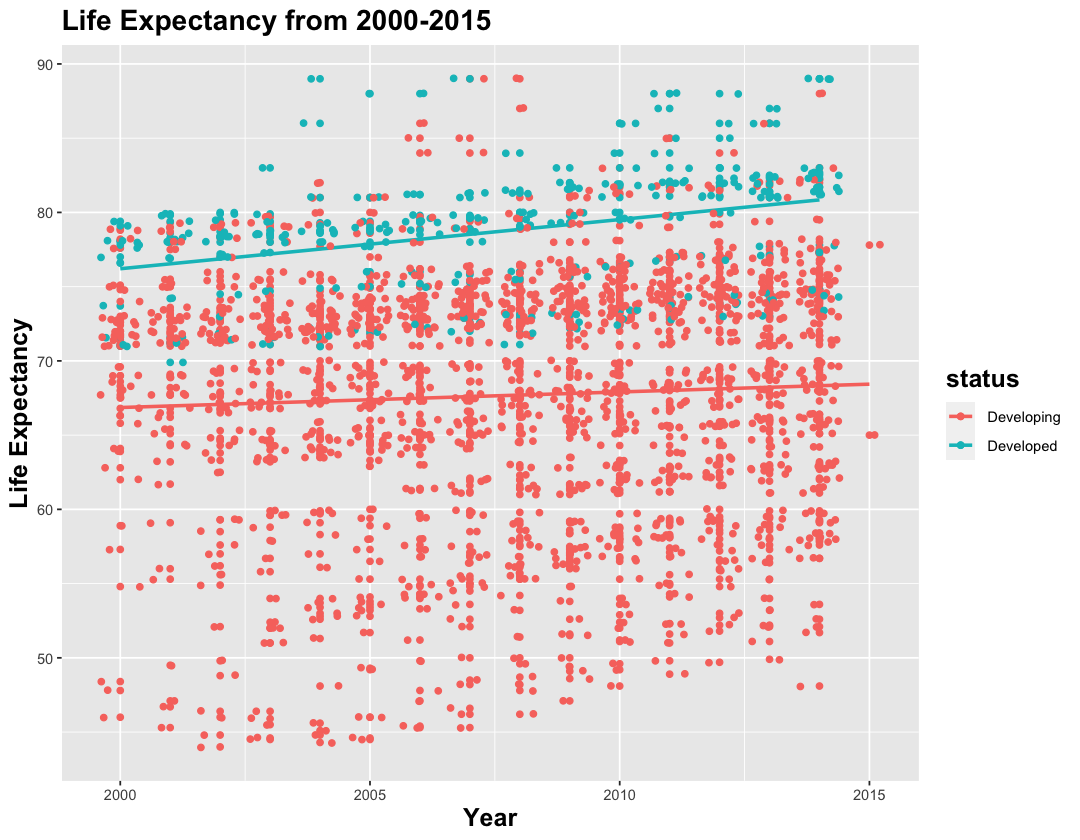

In [15]:
options(repr.plot.width=9, repr.plot.height=7)
le %>% ggplot(mapping=aes(year,life_expectancy, color=status)) + 
    geom_point() + 
    geom_smooth(method="lm",se=FALSE) + 
    theme(plot.title=element_text(size=17, face = "bold"), 
        axis.title=element_text(size=15, face="bold"), 
        legend.title = element_text(size = 15, face = "bold")) + 
    labs(title="Life Expectancy from 2000-2015", x = "Year", y = "Life Expectancy") + 
    geom_jitter()

We are concerned about whether model assumptions are satisfied or not. Potential heteroscedasticity might be a serious issue when making predictioins. Non-constant variance makes the predicted standard deviation of forcast errors unreliable. Thus, we will explore this problem here. 

In [16]:
model <- lm(life_expectancy~., data = le)
model.vif = data.frame(vif = vif(model))
model.vif

,vif
,<dbl>
year,1.160199
status,1.835451
adult_mortality,1.824077
infant_deaths,213.611125
alcohol,2.396838
percentage_expenditure,12.908188
hepatitis_b,1.690982
measles,1.517667
bmi,1.803542


The VIF result of covariates `infant_deaths` and `under_five_deaths` are significantly higher (> 180) than what is empirically taken as a threashold to determine a high correlation (usually greater than 10 indicates high correlation). Although multicollinearity does not seem to affect the expected value of the slope estimator, it reduces the power of the test to detect a significant non-zero slope. Thus, we will try to remove `infant_deaths` first and do a further examination based on the results.  We then explore the VIF of `model1` without the `infant_deaths` variable. 

In [17]:
model1 = lm(life_expectancy ~ .-infant_deaths, data = le)
model1.vif = data.frame(vif = vif(model1))
model1.vif

,vif
,<dbl>
year,1.152460
status,1.835438
adult_mortality,1.800843
alcohol,2.321353
percentage_expenditure,12.905739
hepatitis_b,1.690848
measles,1.407729
bmi,1.801148
under_five_deaths,2.722234


After removing the `infant_deaths` the VIF results seems to be more reasonable, none of the values are extremely high, which indicates a relatively low correlation. So we will continue our model building using the model without `infant_deaths`.   

### 2.4 Train-Test Split

To avoid potential information leakage from the test set which will result in adding bias to our model, we will first split the data into a train set and test set with a ratio of 75 / 25, before performing variable selection using the train set. Also, we want to have approximately the same proportions of data for the factor variable `status` to ensure the two subgroups `Developing` and `Developed` are properly represented in both train and test set. 

In [74]:
set.seed(9122022)
le_split = initial_split(le, prop = 0.75, strata = status)
le_train = training(le_split)
le_test  = testing(le_split)

### 2.5 Variable Selection 

First, we extract the column names for the full set of predictor variables, excluding `life_expectancy`, which is our response variable, for the use of the selection process in the next step. 

In [19]:
names <- colnames(select(le, -life_expectancy, -infant_deaths))
names

[1] "year"                            "status"                         
 [3] "adult_mortality"                 "alcohol"                        
 [5] "percentage_expenditure"          "hepatitis_b"                    
 [7] "measles"                         "bmi"                            
 [9] "under_five_deaths"               "polio"                          
[11] "total_expenditure"               "diphtheria"                     
[13] "hiv_aids"                        "gdp"                            
[15] "population"                      "thinness_1_19_years"            
[17] "thinness_5_9_years"              "income_composition_of_resources"
[19] "schooling"

We first starts out by fitting the full model which is use to compare with selected model using various model selection methods. 

In [20]:
# full model 
full_md = lm(life_expectancy ~ ., data = le_train)

In this step, we will perform a preliminary variable selection using the forward selection method, while we removed `infant_deaths` as previously discussed. The forward selection process begins with a null model. Then iteratively, at each step, the model includes the variable that improves the model the best as the best subset model. The RSS (Residual Sum of Squares) is used as the criterion during the process. The model with the lowest RSS value is qualified as the best. 

In [59]:
le_forward_sel <- regsubsets(
  x =  life_expectancy ~ .-infant_deaths, nvmax = length(names),
  data = le_train,
  method = "forward"
)

coef(le_forward_sel,1) %>% round(3)
coef(le_forward_sel,2) %>% round(3)
coef(le_forward_sel,3) %>% round(3)
coef(le_forward_sel,4) %>% round(3)
coef(le_forward_sel,5) %>% round(3)
coef(le_forward_sel,6) %>% round(3)


le_forward_summary <- summary(le_forward_sel)
le_forward_summary

(Intercept)   schooling 
     41.340       2.305

(Intercept) adult_mortality       schooling 
         55.693          -0.035           1.606

(Intercept) adult_mortality        hiv_aids       schooling 
         53.912          -0.022          -0.438           1.651

(Intercept)                 adult_mortality 
                         52.918                          -0.020 
                       hiv_aids income_composition_of_resources 
                         -0.430                          11.109 
                      schooling 
                          1.126

(Intercept)                 adult_mortality 
                         53.017                          -0.020 
                            bmi                        hiv_aids 
                          0.042                          -0.424 
income_composition_of_resources                       schooling 
                         10.517                           1.008

(Intercept)                 adult_mortality 
                         53.980                          -0.019 
         percentage_expenditure                             bmi 
                          0.000                           0.042 
                       hiv_aids income_composition_of_resources 
                         -0.430                           9.961 
                      schooling 
                          0.928

Subset selection object
Call: regsubsets.formula(x = life_expectancy ~ . - infant_deaths, nvmax = length(names), 
    data = le_train, method = "forward")
19 Variables  (and intercept)
                                Forced in Forced out
year                                FALSE      FALSE
statusDeveloped                     FALSE      FALSE
adult_mortality                     FALSE      FALSE
alcohol                             FALSE      FALSE
percentage_expenditure              FALSE      FALSE
hepatitis_b                         FALSE      FALSE
measles                             FALSE      FALSE
bmi                                 FALSE      FALSE
under_five_deaths                   FALSE      FALSE
polio                               FALSE      FALSE
total_expenditure                   FALSE      FALSE
diphtheria                          FALSE      FALSE
hiv_aids                            FALSE      FALSE
gdp                                 FALSE      FALSE
population          

In [22]:
le_forward_summary_df <- tibble(
    n_input_variables = 1:19,
    RSQ = le_forward_summary$rsq,
    RSS = le_forward_summary$rss,
    ADJ.R2 = le_forward_summary$adjr2,
    Cp = le_forward_summary$cp,
    BIC = le_forward_summary$bic)
le_forward_summary_df

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5281971,46172.95,0.5278148,2123.41852,-914.2366
2,0.7293989,26482.36,0.7289599,694.49040,-1594.2283
3,0.7869052,20854.51,0.7863863,287.51073,-1882.3998
4,0.8079297,18796.95,0.8073056,139.98632,-2003.6706
5,0.8136227,18239.80,0.8128650,101.49846,-2033.7399
6,0.8191147,17702.33,0.8182316,64.43953,-2063.5893
7,0.8216407,17455.12,0.8206239,48.47526,-2073.8512
8,0.8240719,17217.19,0.8229248,33.18469,-2083.6954
9,0.8257898,17049.07,0.8245109,22.96701,-2088.7045


In [23]:
# plot(le_forward_summary$cp, main = "Cp for forward selection",
#   xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 19,
#   col = "red", xaxp = c(1,19,18))

According to the above output, we decide to select the model with 11 variables since it is the elbow point such that adjusted $R^2$ value decreases only by small amount as more variables are included, and Cp and BIC values only decrease a little as more variables are included. We also consider that 11 variables model is already complex and adding more variables do not improve the model in the statistical sense, the tradeoff is not worth it. 

Using the 15 variables selected by forward selection, we will train it using `lm()` with the training dataset and call it `red_md`. We will use this model to predict values of the life expectancy in the test set. 

In [24]:
red_md <- lm(life_expectancy ~ year + status + adult_mortality + alcohol +
             percentage_expenditure + bmi + under_five_deaths + diphtheria + 
             hiv_aids + income_composition_of_resources + schooling, 
          data = le_train)
summary(red_md)


Call:
lm(formula = life_expectancy ~ year + status + adult_mortality + 
    alcohol + percentage_expenditure + bmi + under_five_deaths + 
    diphtheria + hiv_aids + income_composition_of_resources + 
    schooling, data = le_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.5591  -2.2118   0.1043   2.4006  12.5803 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.085e+02  5.428e+01   5.683 1.66e-08 ***
year                            -1.276e-01  2.709e-02  -4.709 2.78e-06 ***
statusDeveloped                  8.716e-01  3.985e-01   2.187 0.028933 *  
adult_mortality                 -1.817e-02  1.149e-03 -15.809  < 2e-16 ***
alcohol                         -1.506e-01  3.901e-02  -3.860 0.000119 ***
percentage_expenditure           4.722e-04  7.226e-05   6.534 9.34e-11 ***
bmi                              3.847e-02  6.681e-03   5.759 1.07e-08 ***
under_five_deaths               -1.795e-03  6.4

We will also explore lasso and ridge regression. As before, we are still not including `infant_deaths`. 

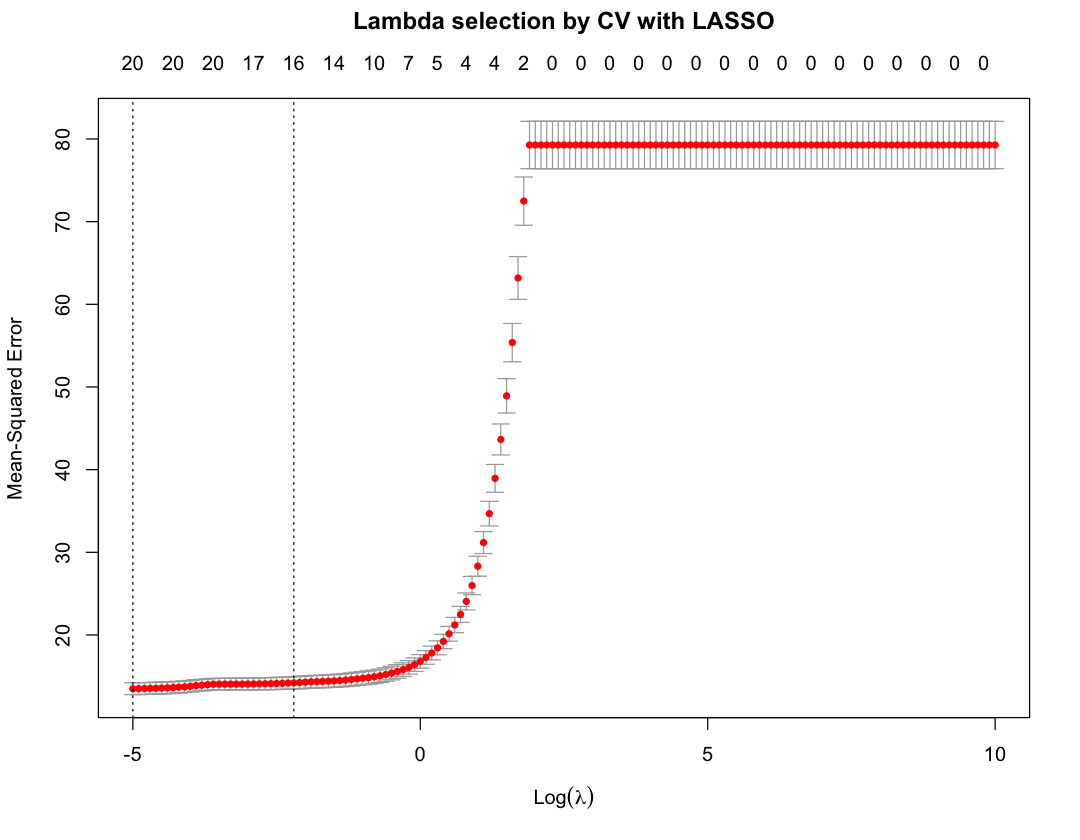

In [52]:
le_X_train <- le_train %>% select(-life_expectancy)  %>% mutate(status = if_else(status == "Developed", 1, 0)) %>% as.matrix()
le_Y_train <- le_train %>% select(life_expectancy)  %>% as.matrix()

le_X_test <- le_test %>% select(-life_expectancy) %>% mutate(status = if_else(status == "Developed", 1, 0)) %>% as.matrix()
le_Y_test <- le_test %>% select(life_expectancy)  %>% as.matrix()

le_cv_lambda_LASSO <- cv.glmnet(
  x = le_X_train, y = le_Y_train,
  alpha = 1,
  lambda = exp(seq(-5, 10, 0.1))
)

plot(le_cv_lambda_LASSO, main = "Lambda selection by CV with LASSO\n\n")

In [53]:
le_lambda_min_MSE_LASSO <- round(le_cv_lambda_LASSO$lambda.min, 4)

le_LASSO_min <- glmnet(
  x = le_X_train, y = le_Y_train,
  alpha = 1,
  lambda = le_lambda_min_MSE_LASSO
)

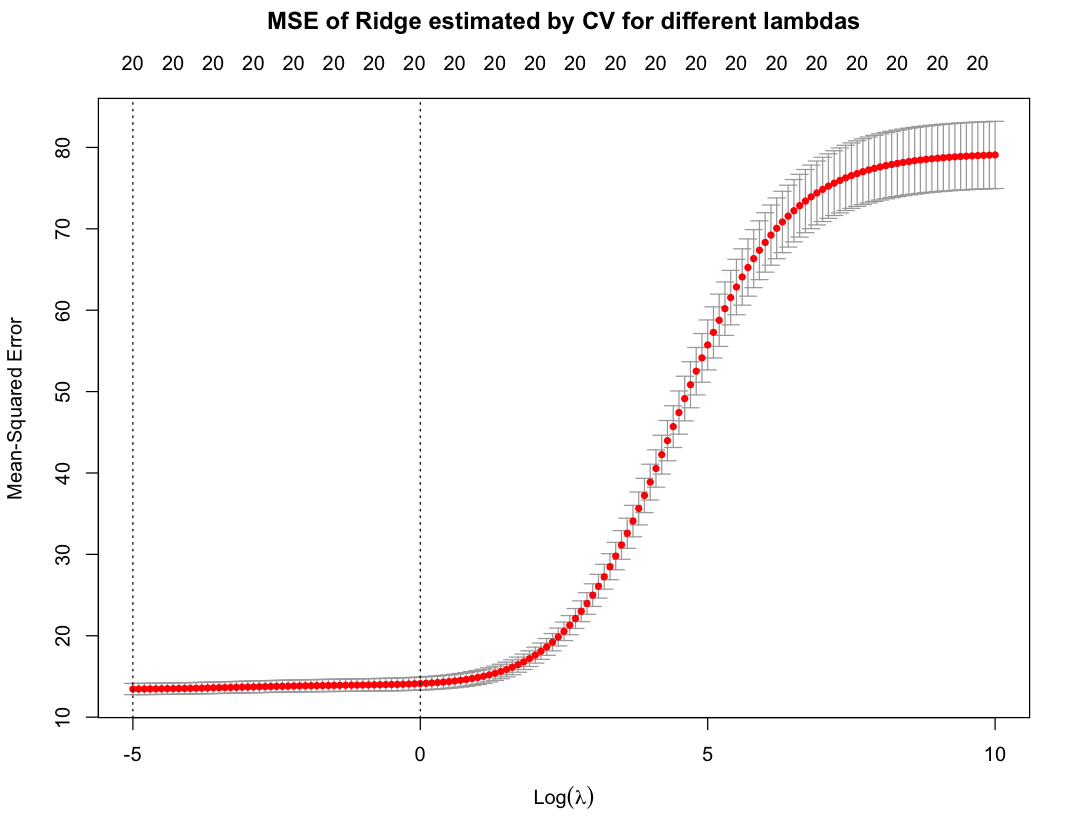

In [54]:
le_cv_lambda_ridge <- cv.glmnet(
  x = le_X_train, y = le_Y_train,
  alpha = 0,
  lambda = exp(seq(-5, 10, 0.1))
)

plot(le_cv_lambda_ridge, main = "MSE of Ridge estimated by CV for different lambdas\n\n")

In [55]:
le_lambda_min_MSE_ridge <- round(le_cv_lambda_ridge$lambda.min, 4)
le_lambda_min_MSE_ridge

le_ridge_min <- glmnet(
  x = le_X_train, y = le_Y_train,
  alpha = 0,
  lambda = le_lambda_min_MSE_ridge
)
le_ridge_min

[1] 0.0067


Call:  glmnet(x = le_X_train, y = le_Y_train, alpha = 0, lambda = le_lambda_min_MSE_ridge) 

  Df  %Dev Lambda
1 20 83.57 0.0067

### 2.7 Model Evaluation

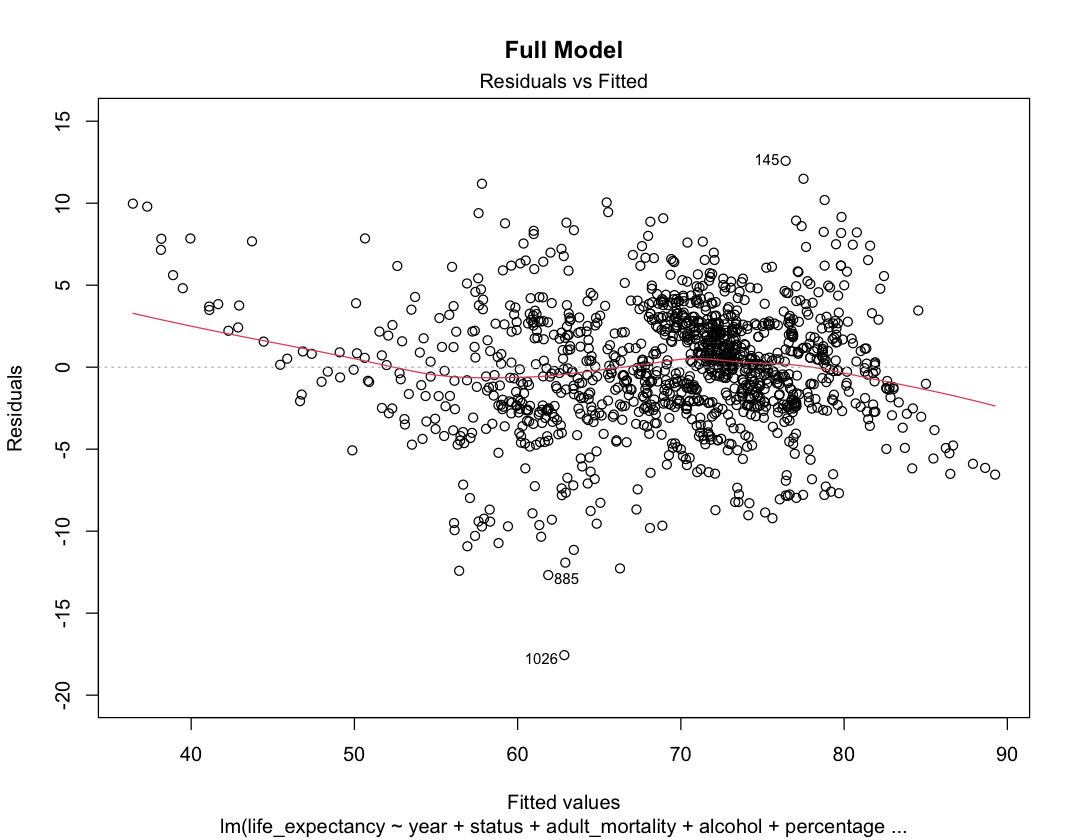

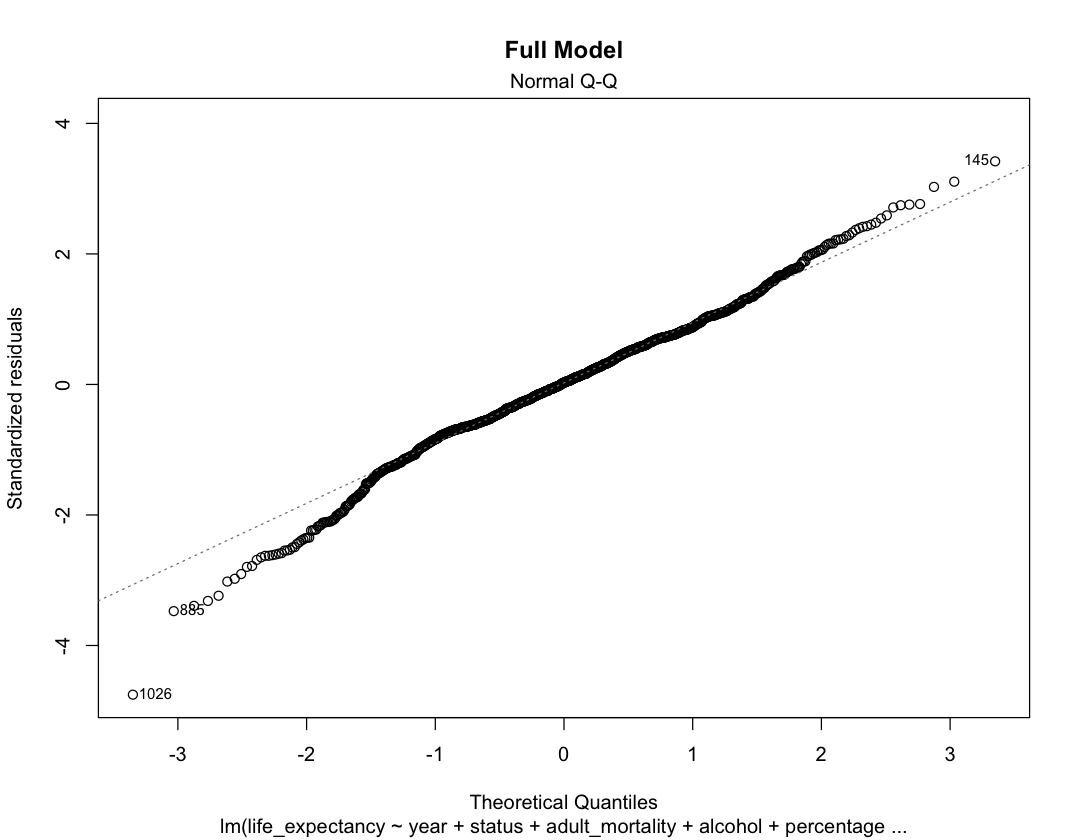

In [29]:
plot(red_md, 1, main = "Full Model")
plot(red_md, 2, main = "Full Model")

The diagonstic plot of full model does not show a uniform and scattered cloud of points. For normal Q-Q plot, most data points are on the 45 degree dotted line, which means that the standardized residuals match the theoretical quantiles of the standard normal distribution. 

Therefore, `red_md` will be our final model. Now, we will perform prediction on the test and calculate the coefficients of determination ($R^2$) to evaluate the model accuracy. 

In [56]:
le_X_test_lasso <- le_test %>% select(-life_expectancy) %>% mutate(status = if_else(status == "Developed", 1, 0)) %>% as.matrix()

le_test_pred_LASSO_min <- predict(le_LASSO_min, newx = le_X_test_lasso)
le_test_pred_ridge_min <- predict(le_ridge_min,newx = le_X_test_lasso)

In [31]:
le_test["pred"] <- predict(red_md, le_test)

# compute coefficients of determination 
r_squared = cor(le_test["life_expectancy"], le_test["pred"]) ^ 2
r_squared[1, 1]

[1] 0.8375581

We obtained a $R^2$ score of 0.831483411372635. This means approximately 83% of variability observed in `life_expectancy` in the test set can be explained by our model. 

In [57]:
models <- tibble(
  Model = "OLS Full Regression",
  R_MSE = rmse(
    le_test$life_expectancy,
    predict(full_md, le_test)
  )
)

models <- rbind(
  models,
  tibble(
    Model = "OLS Reduced Regression",
    R_MSE = rmse(
        le_test$life_expectancy,
        predict(red_md, le_test))
  ),
    tibble(
    Model = "LASSO Regression with minimum MSE",
    R_MSE = rmse(
        le_test_pred_LASSO_min,
        le_test$life_expectancy
    )
  ),
    tibble(
    Model = "Ridge Regression with minimum MSE",
    R_MSE = rmse(
        le_test_pred_ridge_min,
        le_test$life_expectancy
    )
  )
  )
models

Model,R_MSE
<chr>,<dbl>
OLS Full Regression,3.339289
OLS Reduced Regression,3.413471
LASSO Regression with minimum MSE,3.351716
Ridge Regression with minimum MSE,3.349877


### 3. Discussion

- If relevant, discuss whether your results were what you expected to find.

These results were not what we were expecting to find because we expected our reduced model to perform better than our full model. We hypothesized that the full model will overfit to the training data too much, and would perform worse when trying to predict the testing data. However, it turns out that the overfitting benefitted the full model in this case. We are attributing this to a multitude of factors. 

The first is our removal of multicollinearity in our dataset. Multicollinearity doesn't affect the expected value of the slope estimators of our variables, but it increases the variance of the estimator. In this case, however, the multicollinearity didn't have much impact on the predictions, because the covariance in the training and test dataset are similar (they were both taken from one dataset). As such, the full model benefitted from having the extra input variable that is highly correlated with our response variable.

In addition, we noticed that even our reduced model was too complex and overfitting the dataset as it used 11 variables. We tried to reduce the complexity of our predictive model by applying Lasso and Ridge Regression for variable selection and model creation. We also hoped that would be able to handle multicollinearity better than the linear model, specifically in the case of Ridge Regression. As proven by the RMSE, the Lasso and Ridge Regression predicted Life Expectancy better than the reduced model, as proven by the lower RMSE scores (Reduced Regression: 3.41 vs LASSO: 3.35, Ridge: 3.35). However, both methods still performed worse than the full model, which predicted better than all of the predictve models we analyzed. We hypothesize that it because the full model overfitted the model, and would perform worse on a different dataset. To prove this, we would need to perform the predictive test again with multiple different datasets that have the same variables taken into account to predict life expectancy. 

With that being said, the difference in predictive performance between the full model and our predictive models are quite small, and can simply be attributed to sampling variance. As such, our results are quite credible and we can discuss further on the variables that were chosen by the feature selection process.

- Summarize what you found, and the implications/impact of your findings.

Overall, we found that factors such as the adult mortality rate, BMI, HIV/AIDS rate, Income and Schooling are the 5 most important factors that determine a person's life expectancy. As discussed in our introduction, life insurance companies can put a higher weightage on these variables when they are determining pricing plans for their insurance policies, as our study identified these factors to be good predictors of Life Expectancy. The general public can also use this information to increase their understanding of how their lifestyle affects their life expectancy. For example, governments may shift their focus on increasing schooling in low-income districts, in hopes of increasing the overall life expectancy of the citizens. 

- Discuss how your model could be improved.

Our model could've been improved by utilizing a bigger dataset with more recent data that would be more representative of the life expectancy today. We could also improve it by exploring different regression methods that use a different selection method than the ones we've explored. Finally, we can better assess how well our model performs by using a k-fold cross validation method. This would be preferrable as each data entry gets a chance of being a part of the testing dataset.


- Discuss future questions/research this study could lead to.

Through our results, we were able to identify the factors that best predicts one's life expectancy, but it doesn't specify the extent to which it affects life expectancy. As such, our results could be used as the basis of more focused studies on the relationship between one of the factors, such as BMI, with one's life expectancy.

# <center>References</center>

1. Data Science: A First Introduction. Last updated September 24, 2022. [Source](https://datasciencebook.ca/).